In [34]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
              'width': 1000,
              'height': 600,
              'scroll': True,
})

{'width': 1000, 'height': 600, 'scroll': True}

## Forward Mode deep dive

### What if users add more variables after some functions are defined?

* There are only two variables x and y and a function f = x +y in the system

* We use [1,0] for the initial derivative of x  and [0,1] for the initial derivative of y

* Everything is fine as long as user only defines functions of x and y

* Then the user defines two new variables a and b and a new function g = a + b 

* We use [1,0] for the initial derivative of a  and [0,1] for the initial derivative of b

* Then the user defines a new function h = f + g

* And when the user calls partial for the gradient of function h with regarding to a, he gets 2

* ### He adds up variables in different universes

### A possible solution
* Please do not do calculations between variables in different universes
* Please remember that the first position is for x and the second position is for y

### Our solution
* Dictionaries are used to keep gradients of every variable included in the functions and variable objects are used as keys of the dictionaries

## Newton method Example

In [35]:
def NewtonsMethod(func, x0, tol=1e-15, maxiters=1000):
    '''
    Computes the roots of func through iterative guesses until change is below tolerance.

    Takes in a function (func), a point at which to estimate (x0),
        an error tolerance (tol), and a maximum number of iterations (maxiters).

    func must be composed of 'AutoDiff.Operator' operations and AutoDiff.Scalar structures.

    Example usage:
    '''

    xn = x0
    steps = []

    for i in range(maxiters):

        # Calculate y at this step.
        y = func(xn)._val

        # Calculate derivative at this step
        dy_dx = list(func(xn)._jacobian.values())[0]

        # If y reaches tolerance, stop
        if abs(y) < tol:
            return xn._val, steps
            break

        else:
            steps.append((xn._val, y))
            # Compute Newton Step
            x_next = y / dy_dx

            # Update X
            xn = xn - x_next


    return xn._val, steps

In [36]:
import sys
from Dotua.autodiff import AutoDiff as ad
from Dotua.operator import Operator as op
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [37]:
NewtonsMethod(lambda x: x*x, ad.create_scalar(1))[0]
optimize.newton(lambda x: x**2, 1)

1.5813234334835293e-08

In [38]:
ans, steps = NewtonsMethod(lambda x: x*x, ad.create_scalar(1))

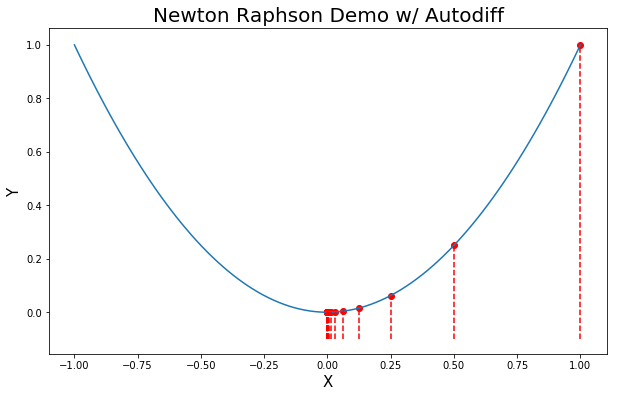

In [39]:
xvals = np.linspace(-1,1,100)

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter([x[0] for x in steps], [x[1] for x in steps], c='r')
ax.plot(xvals, xvals**2)
for step in steps:
    ax.plot([step[0]]*100, np.linspace(-.1, step[1],100), 'r--')
    ax.set_xlabel('X', fontsize=15)
    ax.set_ylabel('Y', fontsize=15)
    ax.set_title('Newton Raphson Demo w/ Autodiff', fontsize=20)
    
ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('Y', fontsize=15)
ax.set_title('Newton Raphson Demo w/ Autodiff', fontsize=20)

plt.savefig('newton.png')
plt.show()

<img src='images/newton_0.png' width="800" align="center">
<img src='images/newton_1.png' width="800" align="center">
<img src='images/newton_2.png' width="800" align="center">
<img src='images/newton_3.png' width="800" align="center">
<img src='images/newton_24.png' width="800" align="center">